# Overshooting Top Area - Updraft Area Uncertainty

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

In [41]:
days = ['16 August 2018 1910-1926 UTC',
        '16 August 2018 1928-1940 UTC',
        '10 November 2018',
        '12 November 2018',
        '14 December 2018']
ota = np.array([191.5, 182, 122, 36, 70])
ua = np.array([75, 85, 50, 12, 35])
ota_error = np.sqrt((16 * ota) - 64)
ua_error = np.sqrt((ua) - 0.25)

m,b = np.polyfit(ota, ua, 1)
sample_otas = np.arange(0, 250)
predicted_ua = (ota * m) + b
r2 = sklearn.metrics.r2_score(ua, predicted_ua)

In [21]:
df = pd.DataFrame({'date':days,
                   'ota':ota,
                   'ua':ua,
                   'ota_error':ota_error,
                   'ua_error':ua_error})

In [22]:
df = df.sort_values('ota')

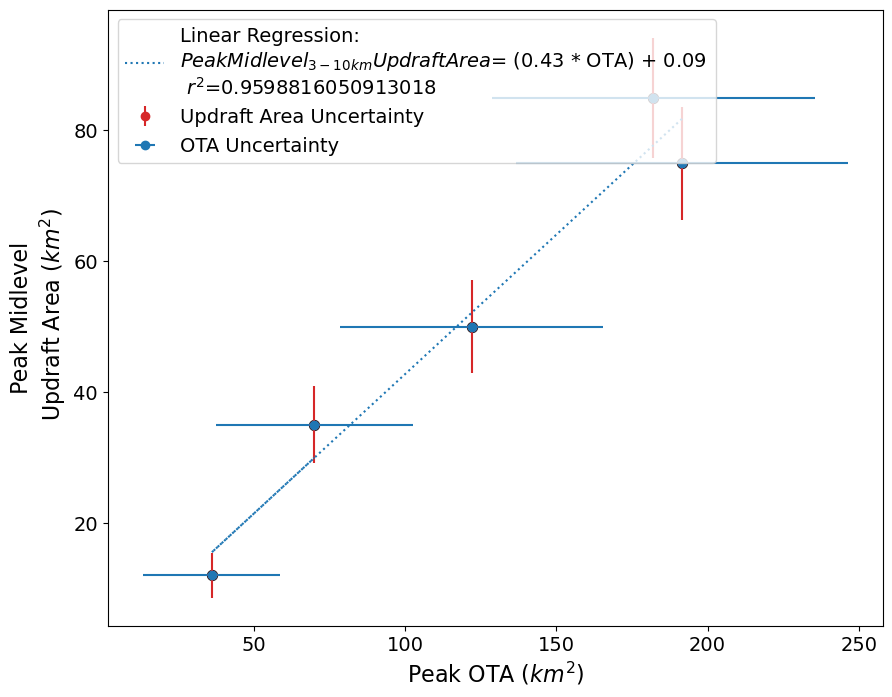

In [58]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.errorbar(df.ota, df.ua, yerr=df.ua_error, color='tab:red', fmt='o', label='Updraft Area Uncertainty')
ax.errorbar(df.ota, df.ua, xerr=df.ota_error, color='tab:blue', fmt='o', label='OTA Uncertainty')
ax.scatter(df.ota, df.ua, s=50, color='k')
plt.plot(ota, predicted_ua, linestyle=':', label=f"Linear Regression: \n" "$Peak Midlevel_{3-10km} Updraft Area$" + f"= ({np.round(m, 2)} * OTA) + {np.round(b, 2)} \n $r^2$={r2}")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', fontsize=14)

plt.xlabel('Peak OTA ($km^2$)', fontsize=16)
plt.ylabel(' Peak Midlevel \n Updraft Area ($km^2$)', fontsize=16)

plt.savefig('OTA_ua_error_scatter.png', dpi=300)